# Background

This project explores the colleage dataset in order to cluster colleages into two groups, Private and Public. Since it is a labeled data, EDA can be first performed to understand if the two groups are actually forming separate clusters. 

During the clustering, the dataset will be treated as unlabelled to simulate the real unsupervised clustering scenarios.

Lastly, the performance of different clustering algorithms, **K-means clustering** and **Agglomerative clustering**, may be evaluated using the true label available. 

The college dataset contains 777 observations on the following 18 variables:
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

# Data overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_college = pd.read_csv('Data/College_Data',index_col=0)

In [3]:
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [4]:
df_college.isnull().any()

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

# EDA
While such EDA won't be possible in real-life clustering scenarios, the data can be explored in this project utilizing the given true labels.

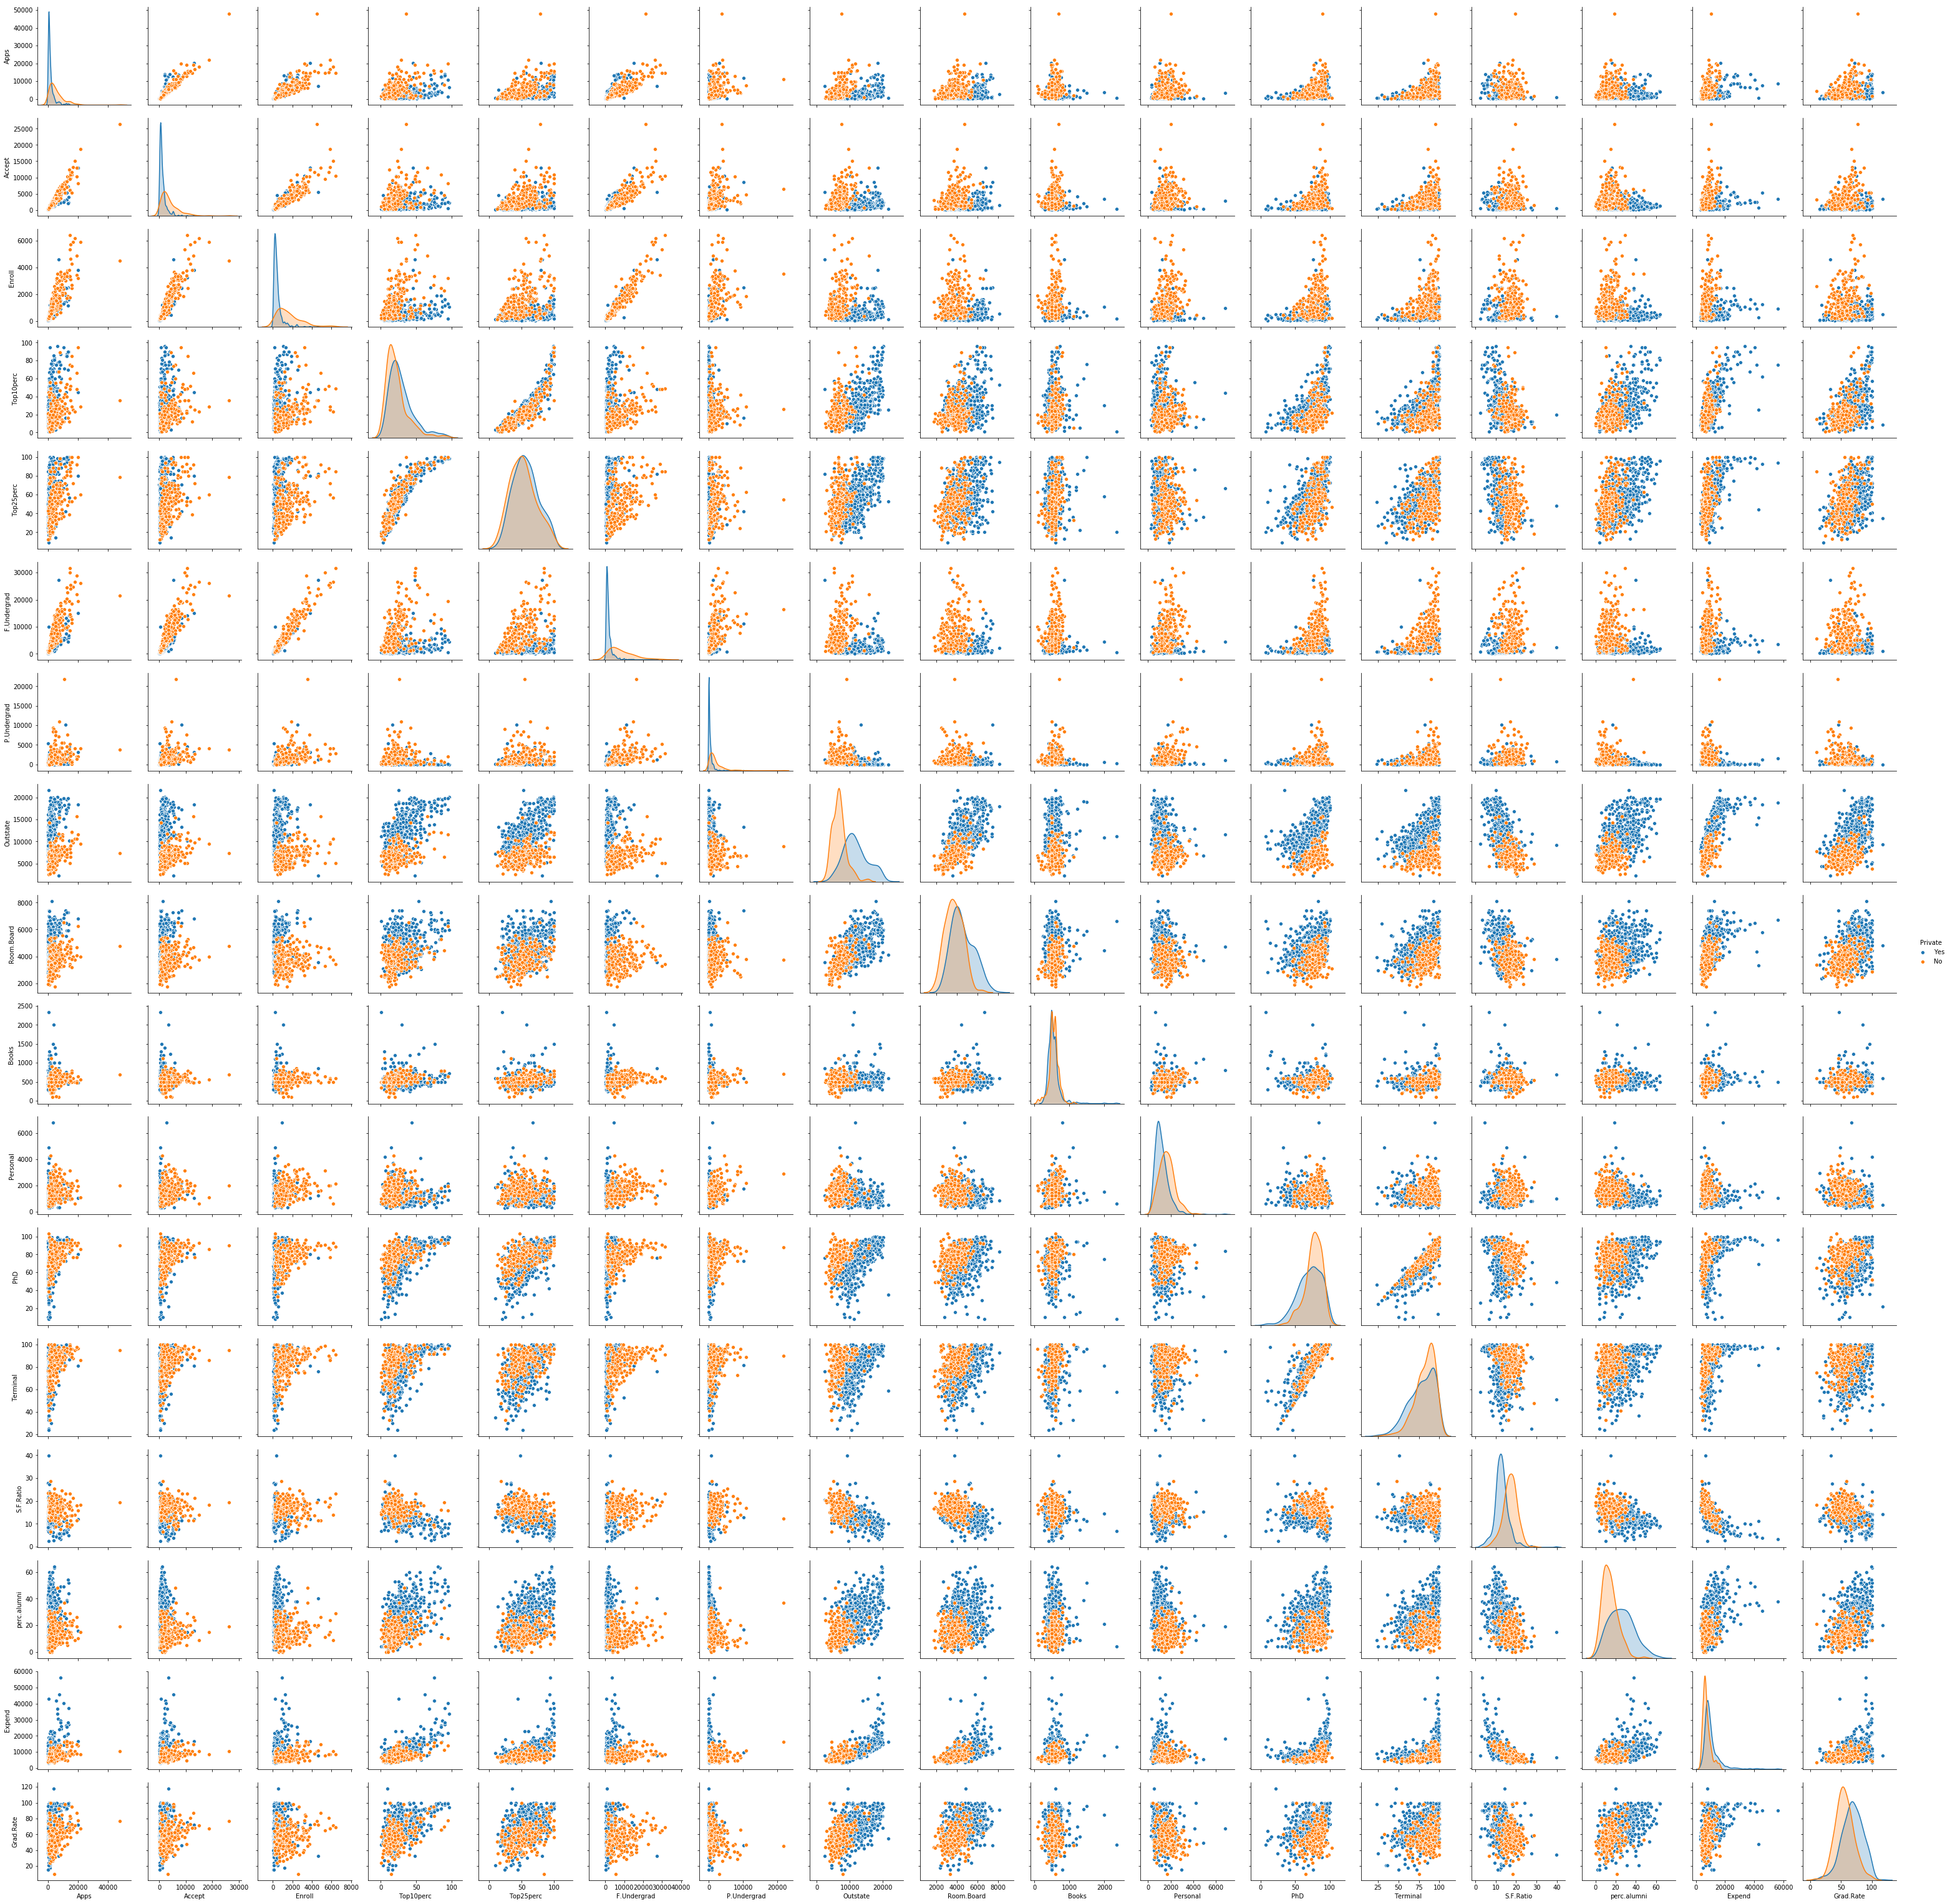

In [5]:
sns.pairplot(df_college,hue='Private')
plt.show()

# Preprocessing: standarization for clustering

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
y = df_college['Private']
X = df_college.drop('Private',axis=1).astype('float')

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X),columns=X.columns,index=X.index)
df_college_scaled = pd.concat([X_scaled,y],axis=1)

# Model 1: K Means Clustering

In [8]:
from sklearn.cluster import KMeans

#### Elbow methos to determin 'K'

In [9]:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_init=20)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

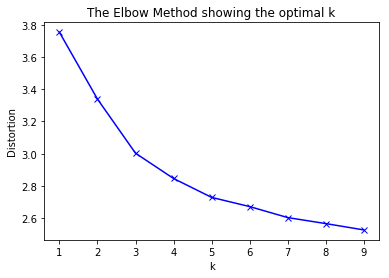

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Unfortunately, the elbow method does not work well on this dataset. However, as we know the true number of clusters beforehand (for this project at least), we can use this information to determine K.

In [11]:
kmeans = KMeans(n_clusters=2).fit(X_scaled)
df_college_scaled['KM_predicted'] = kmeans.labels_

## Evaluation on K Means clustering algorithm

While it is difficult in real life, for this project, the true label is given. Based on this information, the model performance can be evaluated.

In [12]:
df_college_scaled['True_cluster'] = np.where(df_college_scaled['Private']=='Yes',0,1)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
pd.DataFrame(confusion_matrix(df_college_scaled['True_cluster'],kmeans.labels_),index=['True Private','True Public'],
             columns=['Predicted Private','Predicted Public'])

,Predicted Private,Predicted Public
True Private,225,340
True Public,66,146


In [15]:
print(classification_report(df_college_scaled['True_cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.77      0.40      0.53       565
           1       0.30      0.69      0.42       212

   micro avg       0.48      0.48      0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



The K-means clustering alogirhtm performed relatively well with f1 score of 0.54.

# Model 2: Agglomerative Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
df_college_scaled['AGG_predicted'] = agg.labels_

In [17]:
pd.DataFrame(confusion_matrix(df_college_scaled['True_cluster'],agg.labels_),index=['True Private','True Public'],
             columns=['Predicted Private','Predicted Public'])

,Predicted Private,Predicted Public
True Private,552,13
True Public,76,136


In [18]:
print(classification_report(df_college_scaled['True_cluster'],agg.labels_))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       565
           1       0.91      0.64      0.75       212

   micro avg       0.89      0.89      0.89       777
   macro avg       0.90      0.81      0.84       777
weighted avg       0.89      0.89      0.88       777



The agglomertaive clustering algorithm clearly worked better than the K-means, in terms of all different metrics considered.

# Visual evaluation of different clustering models

#### Choose 2 random features to visualize the clusters

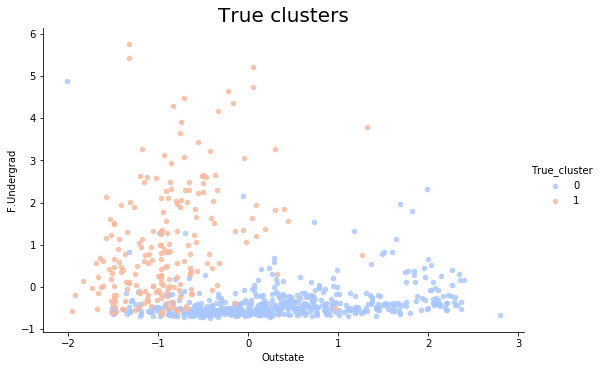

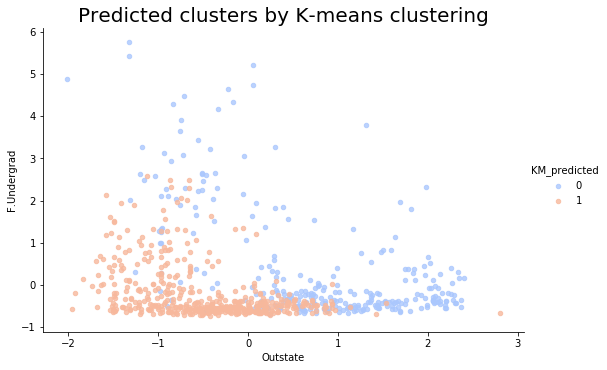

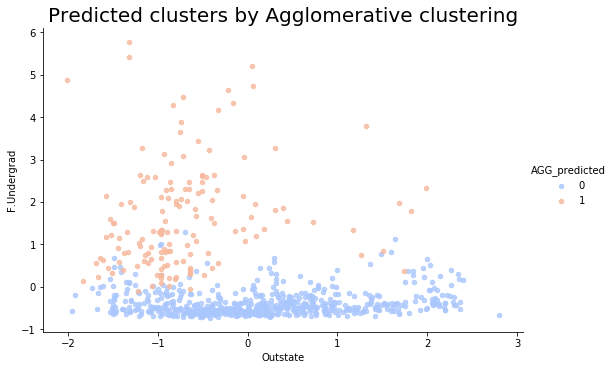

In [19]:
sns.lmplot('Outstate','F.Undergrad',data=df_college_scaled,fit_reg=False,hue='True_cluster',aspect=1.5,
           palette='coolwarm',scatter_kws={'s':20})
plt.title('True clusters',fontsize=20)
plt.show()
sns.lmplot('Outstate','F.Undergrad',data=df_college_scaled,fit_reg=False,hue='KM_predicted',aspect=1.5,
           palette='coolwarm',scatter_kws={'s':20})
plt.title('Predicted clusters by K-means clustering',fontsize=20)
plt.show()

sns.lmplot('Outstate','F.Undergrad',data=df_college_scaled,fit_reg=False,hue='AGG_predicted',aspect=1.5,
           palette='coolwarm',scatter_kws={'s':20})
plt.title('Predicted clusters by Agglomerative clustering',fontsize=20)
plt.show()

For this particular dataset, the evaluation was possible with the true labels. Based on the evaluation, it turned out that the agglomerative clustering algorithm outperformed the K-means clustering algorithm.